##### Copyright 2019 The TensorFlow Authors.

In [ ]:
#@title Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
# https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

# Image classification with TensorFlow Lite Model Maker

In [ ]:
!pip install -q tflite-model-maker

Import the required packages.

In [ ]:
import os

import numpy as np

import tensorflow as tf
assert tf.__version__.startswith('2')

from tflite_model_maker import model_spec
from tflite_model_maker import image_classifier
from tflite_model_maker.config import ExportFormat
from tflite_model_maker.config import QuantizationConfig
from tflite_model_maker.image_classifier import DataLoader

import matplotlib.pyplot as plt

## Simple End-to-End Example

### Get the data path


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#create new directory from dataset
! mkdir datasets

In [ ]:
!cp /content/drive/MyDrive/traffic.zip datasets/

In [ ]:
!unzip datasets/traffic.zip -d datasets/

Archive:  datasets/traffic.zip
   creating: datasets/traffic/Ada pekerjaan di jalan/
  inflating: datasets/traffic/Ada pekerjaan di jalan/Ada pekerjaan di jalan - Copy (2).jpg  
  inflating: datasets/traffic/Ada pekerjaan di jalan/Ada pekerjaan di jalan - Copy (3).jpg  
  inflating: datasets/traffic/Ada pekerjaan di jalan/Ada pekerjaan di jalan - Copy.jpg  
  inflating: datasets/traffic/Ada pekerjaan di jalan/Ada pekerjaan di jalan.jpg  
  inflating: datasets/traffic/Ada pekerjaan di jalan/Screenshot 2021-05-15 141038 - Copy (2).jpg  
  inflating: datasets/traffic/Ada pekerjaan di jalan/Screenshot 2021-05-15 141038 - Copy (3).jpg  
  inflating: datasets/traffic/Ada pekerjaan di jalan/Screenshot 2021-05-15 141038 - Copy.jpg  
  inflating: datasets/traffic/Ada pekerjaan di jalan/Screenshot 2021-05-15 141038.jpg  
  inflating: datasets/traffic/Ada pekerjaan di jalan/Screenshot 2021-05-15 141101 - Copy (2).jpg  
  inflating: datasets/traffic/Ada pekerjaan di jalan/Screenshot 2021-05-15 141

In [ ]:
image_path = "/content/datasets/traffic"

### Run the example



Step 1.   Load input data specific to an on-device ML app. Split it into training data and testing data.

In [ ]:
data = DataLoader.from_folder(image_path)
train_data, test_data = data.split(0.9)

INFO:tensorflow:Load image with size: 1135, num_label: 21, labels: Ada pekerjaan di jalan, Di depan jalan buntu, Dilarang Klakson, Dilarang Masuk, Gerbang Tol, Gereja, Hati-hati, mohon kendaraan pelan, Jalur Evakuasi Gempa Bumi, Jalur Evakuasi Gunung Merapi1, Jalur Evakuasi Tsunami1, Larangan bagi pejalan kaki, Larangan bagi sepeda, Larangan masuk bagi mobil dan motor, Larangan mobil, Larangan sepeda motor, Masjid, Pura, Rawan Kecelakaan, Rumah Sakit, Wihara, bahaya longsoran tanah.


Step 2. Customize the TensorFlow model.

In [ ]:
model = image_classifier.create(train_data)

INFO:tensorflow:Retraining the models...


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
hub_keras_layer_v1v2 (HubKer (None, 1280)              3413024   
_________________________________________________________________
dropout (Dropout)            (None, 1280)              0         
_________________________________________________________________
dense (Dense)                (None, 21)                26901     
Total params: 3,439,925
Trainable params: 26,901
Non-trainable params: 3,413,024
_________________________________________________________________
None
Epoch 1/5


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


31/31 [==============================] - 33s 62ms/step - loss: 2.3135 - accuracy: 0.4032
Epoch 2/5
31/31 [==============================] - 2s 61ms/step - loss: 1.1797 - accuracy: 0.8538
Epoch 3/5
31/31 [==============================] - 2s 61ms/step - loss: 0.9620 - accuracy: 0.9244
Epoch 4/5
31/31 [==============================] - 2s 61ms/step - loss: 0.8564 - accuracy: 0.9758
Epoch 5/5
31/31 [==============================] - 2s 61ms/step - loss: 0.8089 - accuracy: 0.9758


Step 3. Evaluate the model.

In [ ]:
loss, accuracy = model.evaluate(test_data)

4/4 [==============================] - 1s 170ms/step - loss: 0.7581 - accuracy: 0.9825


Step 4.  Export to TensorFlow Lite model.


In [ ]:
model.export(export_dir='datasets')

INFO:tensorflow:Assets written to: /tmp/tmp8gk5o3hy/assets


INFO:tensorflow:Assets written to: /tmp/tmp8gk5o3hy/assets


INFO:tensorflow:Label file is inside the TFLite model with metadata.


INFO:tensorflow:Label file is inside the TFLite model with metadata.


INFO:tensorflow:Saving labels in /tmp/tmp2463xd93/labels.txt


INFO:tensorflow:Saving labels in /tmp/tmp2463xd93/labels.txt


INFO:tensorflow:TensorFlow Lite model exported successfully: datasets/model.tflite


INFO:tensorflow:TensorFlow Lite model exported successfully: datasets/model.tflite


In [ ]:
model.export(export_dir='datasets', export_format=ExportFormat.LABEL)

INFO:tensorflow:Saving labels in datasets/labels.txt


INFO:tensorflow:Saving labels in datasets/labels.txt


In [ ]:
data = DataLoader.from_folder(image_path)

Using Validation data to improve model

Split it to training data (80%), validation data (10%, optional) and testing data (10%).

In [ ]:
train_data, rest_data = data.split(0.8)
validation_data, test_data = rest_data.split(0.5)

Show 25 image examples with labels.

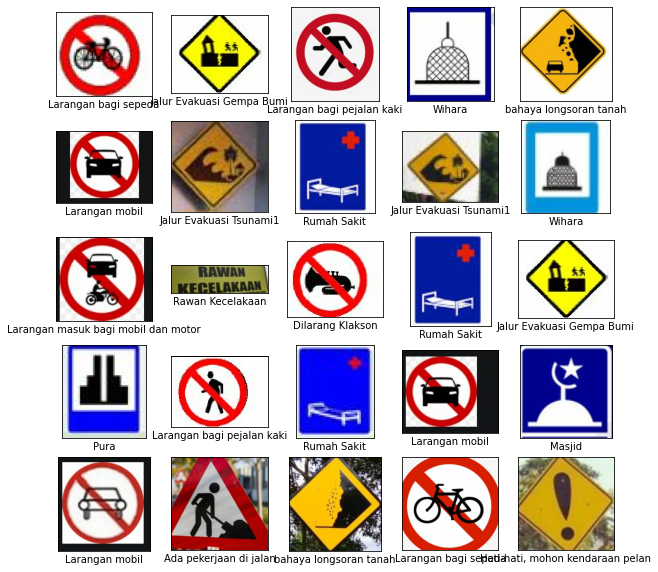

In [ ]:
plt.figure(figsize=(10,10))
for i, (image, label) in enumerate(data.gen_dataset().unbatch().take(25)):
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(image.numpy(), cmap=plt.cm.gray)
  plt.xlabel(data.index_to_label[label.numpy()])
plt.show()

### Step 2: Customize the TensorFlow Model

Create a custom image classifier model based on the loaded data. The default model is EfficientNet-Lite0.


In [ ]:
model = image_classifier.create(train_data, validation_data=validation_data)

INFO:tensorflow:Retraining the models...


INFO:tensorflow:Retraining the models...


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
hub_keras_layer_v1v2_1 (HubK (None, 1280)              3413024   
_________________________________________________________________
dropout_1 (Dropout)          (None, 1280)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 21)                26901     
Total params: 3,439,925
Trainable params: 26,901
Non-trainable params: 3,413,024
_________________________________________________________________
None
Epoch 1/5


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


28/28 [==============================] - 4s 93ms/step - loss: 2.3634 - accuracy: 0.3694 - val_loss: 1.4596 - val_accuracy: 0.7500
Epoch 2/5
28/28 [==============================] - 2s 82ms/step - loss: 1.2444 - accuracy: 0.8460 - val_loss: 1.0061 - val_accuracy: 0.9167
Epoch 3/5
28/28 [==============================] - 2s 83ms/step - loss: 0.9588 - accuracy: 0.9531 - val_loss: 0.8763 - val_accuracy: 0.9688
Epoch 4/5
28/28 [==============================] - 2s 87ms/step - loss: 0.8684 - accuracy: 0.9710 - val_loss: 0.8305 - val_accuracy: 0.9688
Epoch 5/5
28/28 [==============================] - 2s 74ms/step - loss: 0.8221 - accuracy: 0.9810 - val_loss: 0.8028 - val_accuracy: 0.9688


Have a look at the detailed model structure.

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
hub_keras_layer_v1v2_1 (HubK (None, 1280)              3413024   
_________________________________________________________________
dropout_1 (Dropout)          (None, 1280)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 21)                26901     
Total params: 3,439,925
Trainable params: 26,901
Non-trainable params: 3,413,024
_________________________________________________________________


### Step 3: Evaluate the Customized Model

Evaluate the result of the model, get the loss and accuracy of the model.

In [ ]:
loss, accuracy = model.evaluate(test_data)

4/4 [==============================] - 1s 47ms/step - loss: 0.7848 - accuracy: 0.9825


We could plot the predicted results in 100 test images. Predicted labels with red color are the wrong predicted results while others are correct.

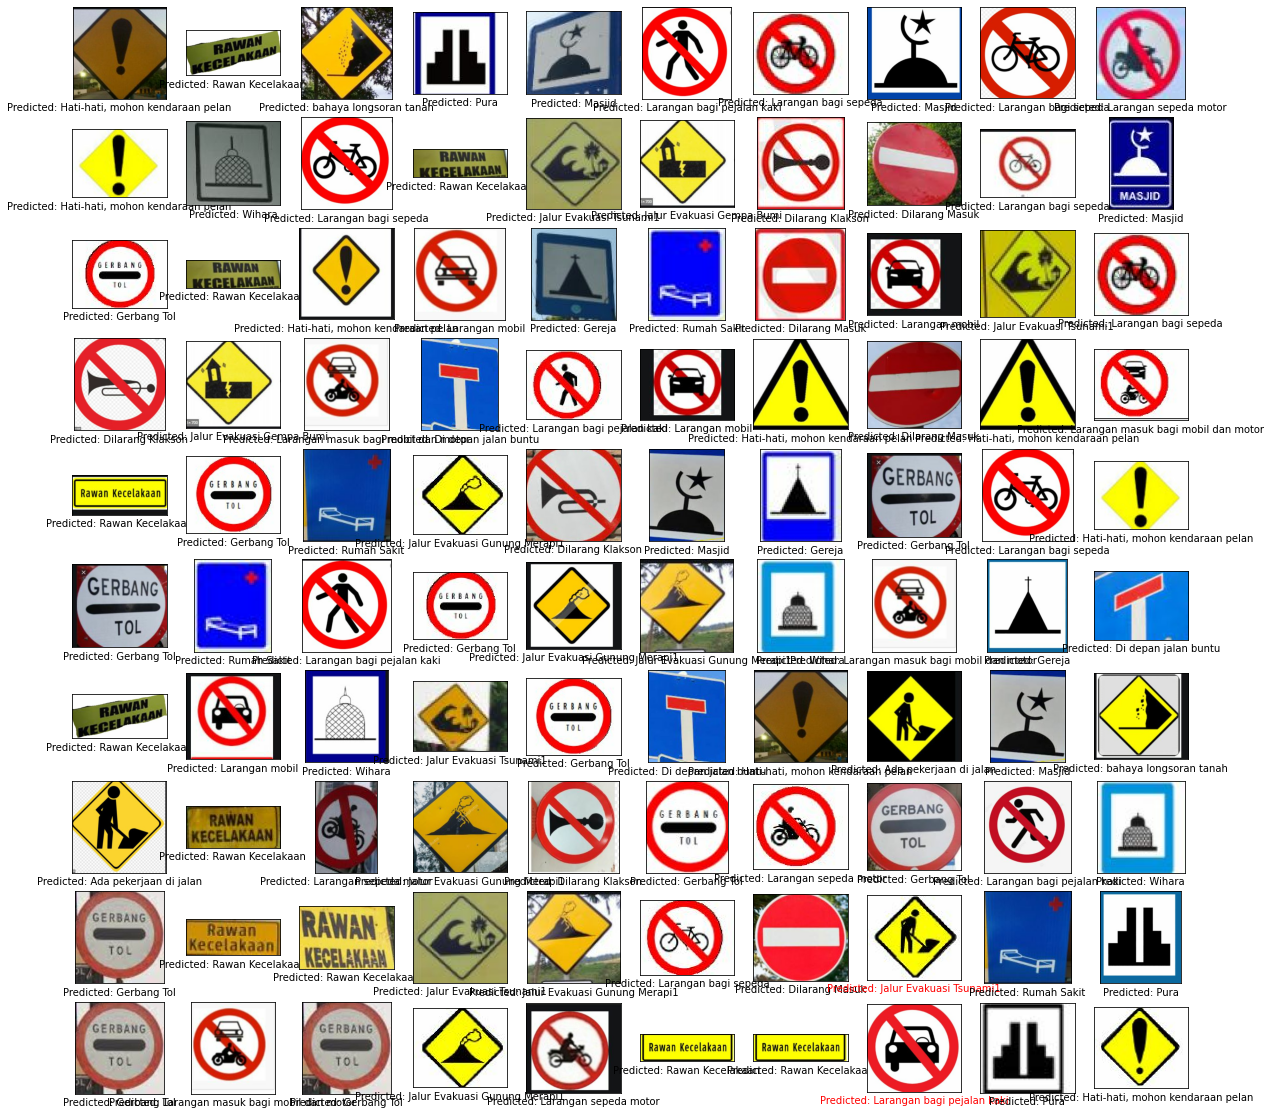

In [ ]:
# A helper function that returns 'red'/'black' depending on if its two input
# parameter matches or not.
def get_label_color(val1, val2):
  if val1 == val2:
    return 'black'
  else:
    return 'red'

# Then plot 100 test images and their predicted labels.
# If a prediction result is different from the label provided label in "test"
# dataset, we will highlight it in red color.
plt.figure(figsize=(20, 20))
predicts = model.predict_top_k(test_data)
for i, (image, label) in enumerate(test_data.gen_dataset().unbatch().take(100)):
  ax = plt.subplot(10, 10, i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(image.numpy(), cmap=plt.cm.gray)

  predict_label = predicts[i][0][0]
  color = get_label_color(predict_label,
                          test_data.index_to_label[label.numpy()])
  ax.xaxis.label.set_color(color)
  plt.xlabel('Predicted: %s' % predict_label)
plt.show()

In [ ]:
model.export(export_dir='.')

INFO:tensorflow:Assets written to: /tmp/tmp9olky4na/assets


INFO:tensorflow:Assets written to: /tmp/tmp9olky4na/assets


INFO:tensorflow:Label file is inside the TFLite model with metadata.


INFO:tensorflow:Label file is inside the TFLite model with metadata.


INFO:tensorflow:Saving labels in /tmp/tmp0zx1fqh3/labels.txt


INFO:tensorflow:Saving labels in /tmp/tmp0zx1fqh3/labels.txt


INFO:tensorflow:TensorFlow Lite model exported successfully: ./model.tflite


INFO:tensorflow:TensorFlow Lite model exported successfully: ./model.tflite


In [ ]:
model.export(export_dir='.', export_format=ExportFormat.LABEL)

INFO:tensorflow:Saving labels in ./labels.txt


INFO:tensorflow:Saving labels in ./labels.txt


In [ ]:
model.export('labels.txt')

INFO:tensorflow:Assets written to: /tmp/tmpcmwpijm0/assets


INFO:tensorflow:Assets written to: /tmp/tmpcmwpijm0/assets


INFO:tensorflow:Label file is inside the TFLite model with metadata.


INFO:tensorflow:Label file is inside the TFLite model with metadata.


INFO:tensorflow:Saving labels in /tmp/tmpu901q0yk/labels.txt


INFO:tensorflow:Saving labels in /tmp/tmpu901q0yk/labels.txt


INFO:tensorflow:TensorFlow Lite model exported successfully: labels.txt/model.tflite


INFO:tensorflow:TensorFlow Lite model exported successfully: labels.txt/model.tflite


You can also evaluate the tflite model with the `evaluate_tflite` method.

In [ ]:
model.evaluate_tflite('model.tflite', test_data)

## Change the model


This is just an additional 

In [ ]:
model = image_classifier.create(train_data, model_spec=model_spec.get('mobilenet_v2'), validation_data=validation_data)

Evaluate the newly retrained MobileNetV2 model to see the accuracy and loss in testing data.

In [ ]:
loss, accuracy = model.evaluate(test_data)

4/4 [==============================] - 1s 138ms/step - loss: 0.6525 - accuracy: 1.0000


In [ ]:
model.export(export_dir='.')

INFO:tensorflow:Assets written to: /tmp/tmpae72pqp5/assets


INFO:tensorflow:Assets written to: /tmp/tmpae72pqp5/assets


INFO:tensorflow:Label file is inside the TFLite model with metadata.


INFO:tensorflow:Label file is inside the TFLite model with metadata.


INFO:tensorflow:Saving labels in /tmp/tmpwz747eae/labels.txt


INFO:tensorflow:Saving labels in /tmp/tmpwz747eae/labels.txt


INFO:tensorflow:TensorFlow Lite model exported successfully: ./model.tflite


INFO:tensorflow:TensorFlow Lite model exported successfully: ./model.tflite


In [ ]:
model.export(export_dir='.', export_format=ExportFormat.LABEL)

INFO:tensorflow:Saving labels in ./labels.txt


INFO:tensorflow:Saving labels in ./labels.txt
